## Import Library Needed

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

## Load Data

In [2]:
with open('Kanye_West.txt', 'r', encoding='unicode_escape') as myfile:
    mytext = myfile.read()

In [ ]:
mytext

## Preprocessing

In [4]:
my_tokenizer = Tokenizer()
my_tokenizer.fit_on_texts([mytext])
total_words = len(my_tokenizer.word_index) + 1

In [ ]:
my_tokenizer.word_index

In [ ]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

In [ ]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

In [8]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [9]:
input_sequences

array([[   0,    0,    0, ...,    0, 2668,  240],
       [   0,    0,    0, ..., 2668,  240, 1097],
       [   0,    0,    0, ...,  240, 1097,  240],
       ...,
       [   0,    0,    0, ...,  814,    6,   10],
       [   0,    0,    0, ...,    0,   25,    9],
       [   0,    0,    0, ...,   25,    9,    3]], dtype=int32)

In [10]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [11]:
X[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 2668,  240, 1097], dtype=int32)

In [12]:
y[2]

240

In [13]:
X

array([[   0,    0,    0, ...,    0,    0, 2668],
       [   0,    0,    0, ...,    0, 2668,  240],
       [   0,    0,    0, ..., 2668,  240, 1097],
       ...,
       [   0,    0,    0, ...,   61,  814,    6],
       [   0,    0,    0, ...,    0,    0,   25],
       [   0,    0,    0, ...,    0,   25,    9]], dtype=int32)

In [14]:
y

array([ 240, 1097,  240, ...,   10,    9,    3], dtype=int32)

In [15]:
# lakukan one hot encoding
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [16]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Define Models

In [18]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           614200    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 6142)              927442    
                                                                 
Total params: 1692242 (6.46 MB)
Trainable params: 1692242 (6.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
hist = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1413/1413 [==============================] - 23s 14ms/step - loss: 6.7223 - accuracy: 0.0414
Epoch 2/100
1413/1413 [==============================] - 11s 8ms/step - loss: 6.1304 - accuracy: 0.0636
Epoch 3/100
1413/1413 [==============================] - 10s 7ms/step - loss: 5.7624 - accuracy: 0.0838
Epoch 4/100
1413/1413 [==============================] - 10s 7ms/step - loss: 5.4345 - accuracy: 0.1026
Epoch 5/100
1413/1413 [==============================] - 9s 7ms/step - loss: 5.0986 - accuracy: 0.1235
Epoch 6/100
1413/1413 [==============================] - 10s 7ms/step - loss: 4.7692 - accuracy: 0.1428
Epoch 7/100
1413/1413 [==============================] - 10s 7ms/step - loss: 4.4509 - accuracy: 0.1683
Epoch 8/100
1413/1413 [==============================] - 10s 7ms/step - loss: 4.1465 - accuracy: 0.1997
Epoch 9/100
1413/1413 [==============================] - 10s 7ms/step - loss: 3.8543 - accuracy: 0.2399
Epoch 10/100
1413/1413 [==============================] - 9s 7ms

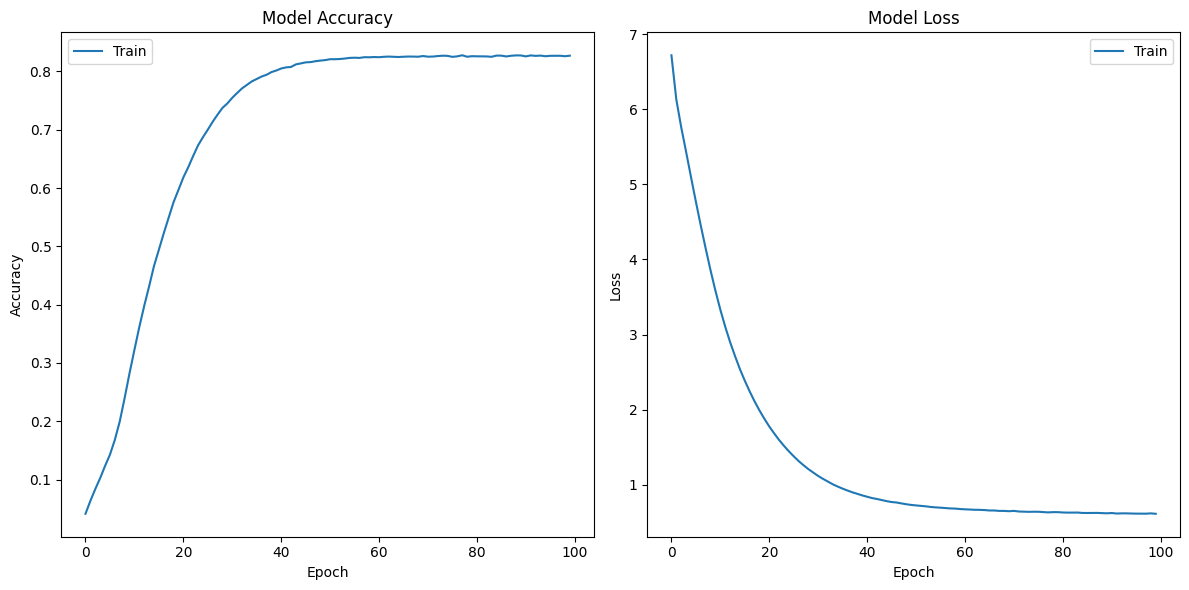

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Make Prediction

## Save Model

In [26]:
model.save("/content/mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model

In [27]:
model_loaded = load_model("/content/mymodel.h5")

In [31]:
import numpy as np

input_text = "most rappers"
predict_next_words = 10

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model_loaded.predict(token_list)[0]

    # Get indices of top predicted words
    top_indices = np.argsort(predictions)[-5:][::-1]  # Adjust 5 to the number of top words you want

    # Get words corresponding to the indices
    next_words = [word for word, index in my_tokenizer.word_index.items() if index in top_indices]

    # Print the list of next words along with their probabilities
    print("Input Text:", input_text)
    print("Next Words and Probabilities:")
    for word, index in zip(next_words, top_indices):
        probability = predictions[index]
        print(f"{word}: {probability:.4f}")

    # Choose the word with the highest probability as the next word
    output_word = my_tokenizer.index_word[top_indices[0]]

    input_text += " " + output_word

print(input_text)

1/1 [==============================] - 0s 35ms/step
Input Text: most rappers
Next Words and Probabilities:
and: 0.9986
to: 0.0003
so: 0.0003
got: 0.0002
taste: 0.0002
1/1 [==============================] - 0s 64ms/step
Input Text: most rappers taste
Next Words and Probabilities:
got: 0.9996
with: 0.0002
aint: 0.0001
girl: 0.0000
level: 0.0000
1/1 [==============================] - 0s 27ms/step
Input Text: most rappers taste level
Next Words and Probabilities:
is: 0.9991
for: 0.0003
aint: 0.0002
way: 0.0001
feel: 0.0001
1/1 [==============================] - 0s 20ms/step
Input Text: most rappers taste level aint
Next Words and Probabilities:
is: 0.9989
at: 0.0005
doin: 0.0001
pimp: 0.0001
hi: 0.0000
1/1 [==============================] - 0s 17ms/step
Input Text: most rappers taste level aint at
Next Words and Probabilities:
a: 0.9883
my: 0.0051
that: 0.0039
me: 0.0006
please: 0.0006
1/1 [==============================] - 0s 17ms/step
Input Text: most rappers taste level aint at my
Next 

In [30]:
input_text = "private jet"
predict_next_words = 15

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[1103, 1104]
1/1 [==============================] - 0s 17ms/step
[1103, 1104, 43]
1/1 [==============================] - 0s 18ms/step
[1103, 1104, 43, 7]
1/1 [==============================] - 0s 17ms/step
[1103, 1104, 43, 7, 75]
1/1 [==============================] - 0s 17ms/step
[1103, 1104, 43, 7, 75, 18]
1/1 [==============================] - 0s 17ms/step
[1103, 1104, 43, 7, 75, 18, 161]
1/1 [==============================] - 0s 19ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7]
1/1 [==============================] - 0s 18ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7, 157]
1/1 [==============================] - 0s 19ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7, 157, 30]
1/1 [==============================] - 0s 20ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7, 157, 30, 64]
1/1 [==============================] - 0s 18ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7, 157, 30, 64, 190]
1/1 [==============================] - 0s 17ms/step
[1103, 1104, 43, 7, 75, 18, 161, 7, 157, 30, 64, 190, 31]
1/1 [=====

## Interpretasi:
Penggunaan model LSTM untuk projek *next word prediction* ini sudah cukup baik untuk mengetahui kata-kata yang harus di generate selanjutnya. namun masih kurang dalam *generating* sebuah keseluruhan sentence yang memiliki makna, model cenderung memunculkan kata-kata baru yang hanya memiliki korelasi makna berjarak pendek terhadap kata-kata sebelumnya. Lalu penggunaan LSTM sebagai model juga belum cukup baik dalam hal efisiensi karena algoritma LSTM yang tidak memerhatikan penting atau tidaknya suatu kata untuk menjadi inti sebuah *sentence* dan mengambil keseluruhan sentence yang panjang untuk diingat pada algoritmanya.